In [ ]:
# pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import pprint
# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
pprint.pprint(bank_marketing.metadata)

# variable information
# print(bank_marketing.variables)


{'abstract': 'The data is related with direct marketing campaigns (phone '
             'calls) of a Portuguese banking institution. The classification '
             'goal is to predict if the client will subscribe a term deposit '
             '(variable y).',
 'additional_info': {'citation': None,
                     'funded_by': None,
                     'instances_represent': None,
                     'preprocessing_description': None,
                     'purpose': None,
                     'recommended_data_splits': None,
                     'sensitive_data': None,
                     'summary': 'The data is related with direct marketing '
                                'campaigns of a Portuguese banking '
                                'institution. The marketing campaigns were '
                                'based on phone calls. Often, more than one '
                                'contact to the same client was required, in '
                                'or

In [ ]:
X.head(100)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,36,management,married,tertiary,no,101,yes,yes,NaN,5,may,426,1,-1,0,NaN
96,55,blue-collar,married,secondary,no,383,no,no,NaN,5,may,287,1,-1,0,NaN
97,60,retired,married,tertiary,no,81,yes,no,NaN,5,may,101,1,-1,0,NaN
98,39,technician,married,secondary,no,0,yes,no,NaN,5,may,203,1,-1,0,NaN


In [ ]:
int(X['contact'].isnull().sum())

13020

In [ ]:
int(X['poutcome'].isnull().sum())

36959

In [ ]:
X['pdays'].value_counts()

pdays
-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: count, Length: 559, dtype: int64

In [ ]:
y.loc[:,'y']=y.loc[:,'y'].map({'yes':1,'no':0})

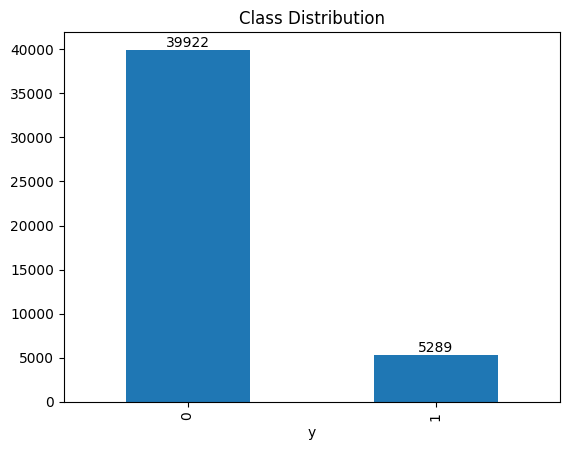

In [ ]:
# class distribution plot of target Y
import matplotlib.pyplot as plt
plt.title('Class Distribution')
plot=y['y'].value_counts().plot(kind='bar')
plot.bar_label(plot.containers[0])
plt.show()

In [ ]:
columns=X.select_dtypes(include=['int64','float64']).columns
for feature in columns:
  Q1=X[feature].quantile(0.25)
  Q3=X[feature].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-(1.5*IQR)
  upper_bound=Q3+(1.5*IQR)
  outlier=X[(X[feature] < lower_bound)|(X[feature] > upper_bound)]
  print(f'{feature}: Total Outliers:',len(outlier))

age: Total Outliers: 487
balance: Total Outliers: 4729
day_of_week: Total Outliers: 0
duration: Total Outliers: 3235
campaign: Total Outliers: 3064
pdays: Total Outliers: 8257
previous: Total Outliers: 8257


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [ ]:
X['job'].count()

44923

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train_raw,x_test_raw,y_train_raw,y_test_raw=train_test_split(X,y,test_size=0.3,random_state=1234,stratify=y)

In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd
imputer = SimpleImputer(strategy='most_frequent', add_indicator=True)
job_imputed_and_indicator = imputer.fit_transform(x_train_raw[['job']])
job_imputed_df = pd.DataFrame(job_imputed_and_indicator, columns=['job', 'job_missing_indicator'], index=x_train_raw.index)
x_train_raw = x_train_raw.drop('job', axis=1)
x_train_raw = pd.concat([x_train_raw, job_imputed_df], axis=1)

x_train_raw.head(100)

,age,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,job,job_missing_indicator
18317,37,married,primary,no,62,no,no,cellular,31,jul,404,2,-1,0,NaN,entrepreneur,False
34712,33,single,tertiary,no,0,yes,no,telephone,5,may,399,2,358,5,other,management,False
7050,44,divorced,secondary,no,-357,yes,yes,NaN,28,may,318,2,-1,0,NaN,technician,False
1195,36,single,secondary,no,206,yes,no,NaN,8,may,183,1,-1,0,NaN,admin.,False
10338,37,married,secondary,no,187,no,no,NaN,12,jun,165,1,-1,0,NaN,housemaid,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29899,34,single,secondary,no,783,yes,no,cellular,4,feb,142,1,-1,0,NaN,blue-collar,False
37062,33,married,primary,no,61,yes,no,cellular,13,may,161,1,-1,0,NaN,self-employed,False
43825,23,single,secondary,no,922,no,no,cellular,28,may,538,2,184,9,failure,student,False
38797,38,divorced,secondary,no,1559,yes,no,cellular,18,may,22,6,179,10,failure,technician,False


In [ ]:
job_imputed_and_indicator_test=imputer.transform(x_test_raw[['job']])
job_imputed_df_test=pd.DataFrame(job_imputed_and_indicator_test,columns=['job','job_missing_indicator'],index=x_test_raw.index)
x_test_raw=x_test_raw.drop('job',axis=1)
x_test_raw=pd.concat([x_test_raw,job_imputed_df_test],axis=1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
one_hot_encoding=OneHotEncoder(handle_unknown='ignore',sparse_output=False,drop='first')
cols=x_train_raw.select_dtypes(include=['object']).columns
X_encoded=one_hot_encoding.fit_transform(x_train_raw[cols])
col_names=one_hot_encoding.get_feature_names_out(cols)
X_encoded=pd.DataFrame(X_encoded,columns=col_names,index=x_train_raw.index)

In [ ]:
encoded_df=pd.concat([x_train_raw.drop(cols,axis=1),X_encoded],axis=1)
encoded_df.head()

,age,balance,day_of_week,duration,campaign,pdays,previous,marital_married,marital_single,education_secondary,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_missing_indicator_True
18317,37,62,31,404,2,-1,0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34712,33,0,5,399,2,358,5,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7050,44,-357,28,318,2,-1,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1195,36,206,8,183,1,-1,0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10338,37,187,12,165,1,-1,0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cols=x_test_raw.select_dtypes(include=['object']).columns
X_encoded_test=one_hot_encoding.transform(x_test_raw[cols])
col_names=one_hot_encoding.get_feature_names_out(cols)
X_encoded_test=pd.DataFrame(X_encoded_test,columns=col_names,index=x_test_raw.index)

In [ ]:
encoded_df_test=pd.concat([x_test_raw.drop(cols,axis=1),X_encoded_test],axis=1)
encoded_df_test.head()

,age,balance,day_of_week,duration,campaign,pdays,previous,marital_married,marital_single,education_secondary,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_missing_indicator_True
34775,33,4835,6,362,2,-1,0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27675,30,9531,21,105,4,-1,0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19290,45,333,6,166,2,-1,0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31540,40,738,2,399,2,258,3,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4102,39,259,19,27,1,-1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


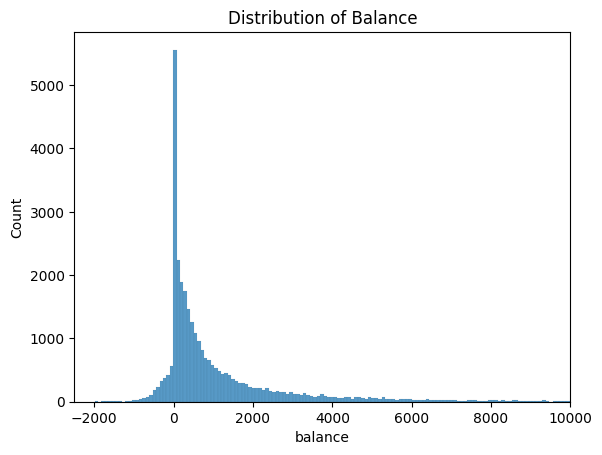

In [ ]:
import seaborn as sns
plt.title('Distribution of Balance')
plot=sns.histplot(data=encoded_df,x='balance')
plt.xlim(-2500,10000)
plt.show()

In [ ]:
encoded_df['overdraft']=encoded_df['balance'].apply(lambda x:0 if x >=0 else abs(x))
encoded_df[encoded_df['balance']<=0]

,age,balance,day_of_week,duration,campaign,pdays,previous,marital_married,marital_single,education_secondary,...,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_missing_indicator_True,overdraft
34712,33,0,5,399,2,358,5,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7050,44,-357,28,318,2,-1,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,357
8365,49,-1193,3,73,1,-1,0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1193
6191,56,-663,27,243,2,-1,0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,663
14666,38,0,15,105,7,-1,0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22632,33,0,22,208,1,-1,0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
39611,34,0,26,93,1,-1,0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
36386,37,0,11,148,2,-1,0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6254,31,-704,27,195,2,-1,0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,704


In [ ]:
encoded_df_test['overdraft']=encoded_df_test['balance'].apply(lambda x:0 if x >=0 else abs(x))
encoded_df_test[encoded_df_test['balance']<=0]

,age,balance,day_of_week,duration,campaign,pdays,previous,marital_married,marital_single,education_secondary,...,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_missing_indicator_True,overdraft
9531,39,-571,6,180,2,-1,0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,571
16608,38,-129,24,138,2,-1,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129
18016,50,0,30,144,9,-1,0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6384,22,0,27,394,1,-1,0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
39794,55,0,1,106,1,91,1,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8221,41,0,2,157,3,-1,0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
7100,43,-111,29,132,3,-1,0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111
1864,28,-125,9,67,3,-1,0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,125
37988,47,-497,14,176,2,-1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,497


In [ ]:
encoded_df['balance']=encoded_df['balance'].apply(lambda x: 0 if x < 0 else x)
encoded_df[encoded_df['balance']==0]

,age,balance,day_of_week,duration,campaign,pdays,previous,marital_married,marital_single,education_secondary,...,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_missing_indicator_True,overdraft
34712,33,0,5,399,2,358,5,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7050,44,0,28,318,2,-1,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,357
8365,49,0,3,73,1,-1,0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1193
6191,56,0,27,243,2,-1,0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,663
14666,38,0,15,105,7,-1,0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22632,33,0,22,208,1,-1,0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
39611,34,0,26,93,1,-1,0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
36386,37,0,11,148,2,-1,0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6254,31,0,27,195,2,-1,0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,704


In [ ]:
encoded_df_test['balance']=encoded_df_test['balance'].apply(lambda x: 0 if x < 0 else x)
encoded_df_test[encoded_df_test['balance']==0]

,age,balance,day_of_week,duration,campaign,pdays,previous,marital_married,marital_single,education_secondary,...,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_missing_indicator_True,overdraft
9531,39,0,6,180,2,-1,0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,571
16608,38,0,24,138,2,-1,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129
18016,50,0,30,144,9,-1,0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6384,22,0,27,394,1,-1,0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
39794,55,0,1,106,1,91,1,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8221,41,0,2,157,3,-1,0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
7100,43,0,29,132,3,-1,0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111
1864,28,0,9,67,3,-1,0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,125
37988,47,0,14,176,2,-1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,497


In [ ]:
columns=['balance','overdraft']
for feature in columns:
  Q1=encoded_df[feature].quantile(0.25)
  Q3=encoded_df[feature].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-(1.5*IQR)
  upper_bound=Q3+(1.5*IQR)
  outlier=encoded_df[(encoded_df[feature] < lower_bound)|(encoded_df[feature] > upper_bound)]
  print(f'{feature}: Total Outliers:',len(outlier))

balance: Total Outliers: 3284
overdraft: Total Outliers: 2670


In [ ]:
import numpy as np
encoded_df['balance']=np.log1p(encoded_df['balance'])
encoded_df['overdraft']=np.log1p(encoded_df['overdraft'])
encoded_df_test['balance']=np.log1p(encoded_df_test['balance'])
encoded_df_test['overdraft']=np.log1p(encoded_df_test['overdraft'])

In [ ]:
encoded_df[['balance','overdraft']].head(200)

,balance,overdraft
18317,4.143135,0.000000
34712,0.000000,0.000000
7050,0.000000,5.880533
1195,5.332719,0.000000
10338,5.236442,0.000000
...,...,...
18859,7.724447,0.000000
7070,5.505332,0.000000
10124,6.016157,0.000000
14393,4.682131,0.000000


In [ ]:
columns=['balance','overdraft']
for feature in columns:
  Q1=encoded_df[feature].quantile(0.25)
  Q3=encoded_df[feature].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-(1.5*IQR)
  upper_bound=Q3+(1.5*IQR)
  outlier=encoded_df[(encoded_df[feature] < lower_bound)|(encoded_df[feature] > upper_bound)]
  print(f'{feature}: Total Outliers:',len(outlier))

balance: Total Outliers: 0
overdraft: Total Outliers: 2670


In [ ]:
columns=['balance','overdraft']
for feature in columns:
  Q1=encoded_df_test[feature].quantile(0.25)
  Q3=encoded_df_test[feature].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-(1.5*IQR)
  upper_bound=Q3+(1.5*IQR)
  outlier=encoded_df_test[(encoded_df_test[feature] < lower_bound)|(encoded_df_test[feature] > upper_bound)]
  print(f'{feature}: Total Outliers:',len(outlier))

balance: Total Outliers: 2132
overdraft: Total Outliers: 1096


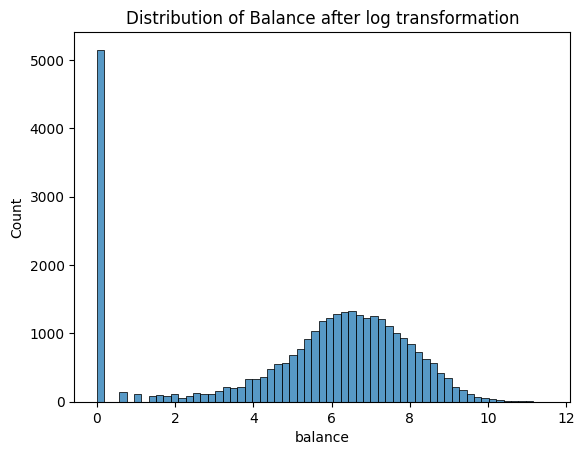

In [ ]:
import seaborn as sns
plt.title('Distribution of Balance after log transformation')
plot=sns.histplot(data=encoded_df,x='balance')
plt.show()

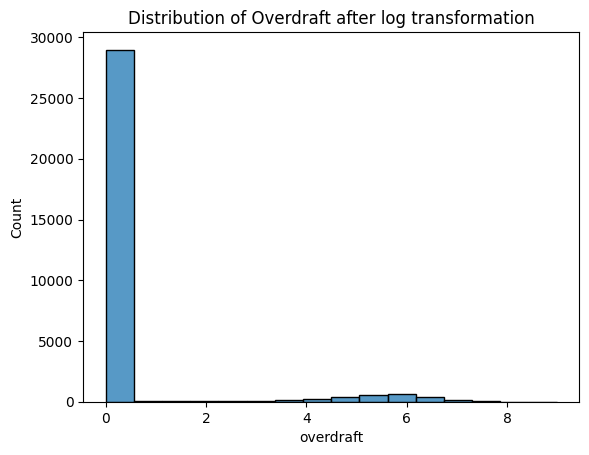

In [ ]:
import seaborn as sns
plt.title('Distribution of Overdraft after log transformation')
plot=sns.histplot(data=encoded_df,x='overdraft')
plt.show()

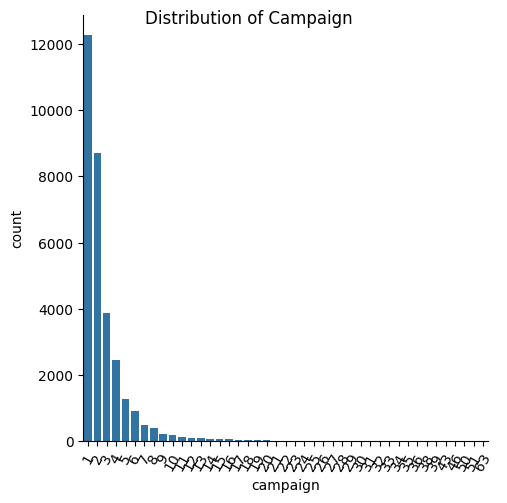

In [ ]:
plot = sns.catplot(data=encoded_df, x='campaign', kind='count', errorbar=None)
plot.fig.suptitle('Distribution of Campaign')
plot.set_xticklabels(rotation=60)
plt.show()

In [ ]:
from sklearn.preprocessing import PowerTransformer
transformer=PowerTransformer(method='yeo-johnson',standardize=False)
encoded_df['campaign1']=transformer.fit_transform(encoded_df['campaign'].values.reshape(-1,1))

In [ ]:
Q1=encoded_df['campaign1'].quantile(0.25)
Q3=encoded_df['campaign1'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
outlier=encoded_df[(encoded_df['campaign1'] < lower_bound)|(encoded_df['campaign1'] > upper_bound)]
print('campaign1 : Total Outliers:',len(outlier))

campaign1 : Total Outliers: 0


In [ ]:
encoded_df_test['campaign1']=transformer.transform(encoded_df_test['campaign'].values.reshape(-1,1))

In [ ]:
Q1=encoded_df_test['campaign1'].quantile(0.25)
Q3=encoded_df_test['campaign1'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
outlier=encoded_df_test[(encoded_df_test['campaign1'] < lower_bound)|(encoded_df_test['campaign1'] > upper_bound)]
print('campaign1 : Total Outliers:',len(outlier))

campaign1 : Total Outliers: 0


In [ ]:
import numpy as np
cap_value=np.percentile(encoded_df['campaign'],95)
print(cap_value)
encoded_df['campaign2'] = encoded_df['campaign'].apply(lambda x: cap_value if x > cap_value else x)
encoded_df_test['campaign2'] = encoded_df_test['campaign'].apply(lambda x: cap_value if x > cap_value else x)

8.0


In [ ]:
Q1=encoded_df['campaign2'].quantile(0.25)
Q3=encoded_df['campaign2'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
outlier=encoded_df[(encoded_df['campaign2'] < lower_bound)|(encoded_df['campaign2'] > upper_bound)]
print('campaign2 : Total Outliers:',len(outlier))

campaign2 : Total Outliers: 2130


In [ ]:
Q1=encoded_df_test['campaign2'].quantile(0.25)
Q3=encoded_df_test['campaign2'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
outlier=encoded_df_test[(encoded_df_test['campaign2'] < lower_bound)|(encoded_df_test['campaign2'] > upper_bound)]
print('campaign2 : Total Outliers:',len(outlier))

campaign2 : Total Outliers: 934


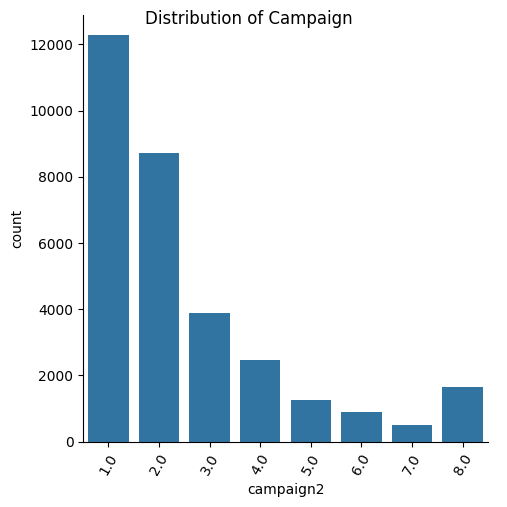

In [ ]:
plot = sns.catplot(data=encoded_df, x='campaign2', kind='count', errorbar=None)
plot.fig.suptitle('Distribution of Campaign')
plot.set_xticklabels(rotation=60)
plt.show()

In [ ]:
cap_value = encoded_df[encoded_df['pdays'] != -1]['pdays'].quantile(0.95)
print(cap_value)
encoded_df['pdays_capped'] = encoded_df['pdays'].apply(lambda x: cap_value if x > cap_value else x)
encoded_df_test['pdays_capped'] = encoded_df_test['pdays'].apply(lambda x: cap_value if x > cap_value else x)

370.0


In [ ]:
Q1=encoded_df['pdays_capped'].quantile(0.25)
Q3=encoded_df['pdays_capped'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
outlier=encoded_df[(encoded_df['pdays_capped'] < lower_bound)|(encoded_df['pdays_capped'] > upper_bound)]
print('pdays_capped : Total Outliers:',len(outlier))

pdays_capped : Total Outliers: 5776


In [ ]:
Q1=encoded_df_test['pdays_capped'].quantile(0.25)
Q3=encoded_df_test['pdays_capped'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
outlier=encoded_df_test[(encoded_df_test['pdays_capped'] < lower_bound)|(encoded_df_test['pdays_capped'] > upper_bound)]
print('pdays_capped : Total Outliers:',len(outlier))

pdays_capped : Total Outliers: 2481


In [ ]:
encoded_df['pdays_clean'] = encoded_df['pdays'].replace(-1, 0)
encoded_df['pdays_log'] = np.log1p(encoded_df['pdays_clean'])  # log(0 + 1) = 0 for -1s
encoded_df_test['pdays_clean'] = encoded_df_test['pdays'].replace(-1, 0)
encoded_df_test['pdays_log'] = np.log1p(encoded_df_test['pdays_clean'])  # log(0 + 1) = 0 for -1s

In [ ]:
Q1=encoded_df['pdays_log'].quantile(0.25)
Q3=encoded_df['pdays_log'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
outlier=encoded_df[(encoded_df['pdays_log'] < lower_bound)|(encoded_df['pdays_log'] > upper_bound)]
print('pdays_log : Total Outliers:',len(outlier))

pdays_log : Total Outliers: 5776


In [ ]:
Q1=encoded_df_test['pdays_log'].quantile(0.25)
Q3=encoded_df_test['pdays_log'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
outlier=encoded_df_test[(encoded_df_test['pdays_log'] < lower_bound)|(encoded_df_test['pdays_log'] > upper_bound)]
print('pdays_log : Total Outliers:',len(outlier))

pdays_log : Total Outliers: 2481


In [ ]:
from sklearn.preprocessing import PowerTransformer
transformer=PowerTransformer(method='yeo-johnson',standardize=False)
encoded_df['yeo_john_trans_pdays']=transformer.fit_transform(encoded_df['pdays_clean'].values.reshape(-1,1))
encoded_df_test['yeo_john_trans_pdays']=transformer.transform(encoded_df_test['pdays_clean'].values.reshape(-1,1))

In [ ]:
Q1=encoded_df['yeo_john_trans_pdays'].quantile(0.25)
Q3=encoded_df['yeo_john_trans_pdays'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
outlier=encoded_df[(encoded_df['yeo_john_trans_pdays'] < lower_bound)|(encoded_df['yeo_john_trans_pdays'] > upper_bound)]
print('yeo_john_trans_pdays : Total Outliers:',len(outlier))

yeo_john_trans_pdays : Total Outliers: 5776


In [ ]:
Q1=encoded_df_test['yeo_john_trans_pdays'].quantile(0.25)
Q3=encoded_df_test['yeo_john_trans_pdays'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
outlier=encoded_df_test[(encoded_df_test['yeo_john_trans_pdays'] < lower_bound)|(encoded_df_test['yeo_john_trans_pdays'] > upper_bound)]
print('yeo_john_trans_pdays : Total Outliers:',len(outlier))

yeo_john_trans_pdays : Total Outliers: 2481


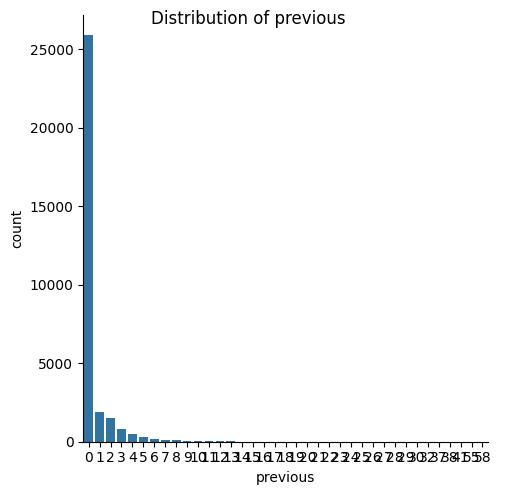

In [ ]:
plot=sns.catplot(data=encoded_df,x='previous',kind='count',errorbar=None)
plot.fig.suptitle('Distribution of previous')
plt.show()

In [ ]:
encoded_df['previous'].value_counts(ascending=True)

previous
41        1
55        1
28        1
32        1
38        1
26        1
58        1
37        2
27        2
21        3
30        3
25        3
24        4
29        4
18        4
20        5
22        5
23        7
19       10
17       11
16       12
14       13
15       14
13       26
12       31
10       50
11       51
9        68
8        93
7       128
6       198
5       318
4       504
3       788
2      1491
1      1921
0     25871
Name: count, dtype: int64

In [ ]:
capvalue=np.percentile(encoded_df['previous'],97)
print(capvalue)
encoded_df['previous_capped']=encoded_df['previous'].apply(lambda x: capvalue if x > capvalue else x)
encoded_df_test['previous_capped']=encoded_df_test['previous'].apply(lambda x: capvalue if x > capvalue else x)

5.0


In [ ]:
Q1=encoded_df['previous_capped'].quantile(0.25)
Q3=encoded_df['previous_capped'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
outlier=encoded_df[(encoded_df['previous_capped'] < lower_bound)|(encoded_df['previous_capped'] > upper_bound)]
print('previous_capped : Total Outliers:',len(outlier))

previous_capped : Total Outliers: 5776


In [ ]:
Q1=encoded_df_test['previous_capped'].quantile(0.25)
Q3=encoded_df_test['previous_capped'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
outlier=encoded_df_test[(encoded_df_test['previous_capped'] < lower_bound)|(encoded_df_test['previous_capped'] > upper_bound)]
print('previous_capped : Total Outliers:',len(outlier))

previous_capped : Total Outliers: 2481


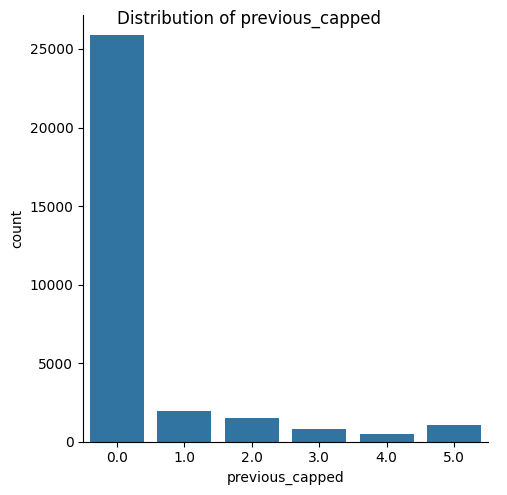

In [ ]:
plot=sns.catplot(data=encoded_df,x='previous_capped',kind='count',errorbar=None)
plot.fig.suptitle('Distribution of previous_capped')
plt.show()

In [ ]:
from sklearn.preprocessing import PowerTransformer
transformer=PowerTransformer(method='yeo-johnson',standardize=False)
encoded_df['previous_powtrans']=transformer.fit_transform(encoded_df['previous_capped'].values.reshape(-1,1))
encoded_df_test['previous_powtrans']=transformer.transform(encoded_df_test['previous_capped'].values.reshape(-1,1))

In [ ]:
Q1=encoded_df['previous_powtrans'].quantile(0.25)
Q3=encoded_df['previous_powtrans'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
outlier=encoded_df[(encoded_df['previous_powtrans'] < lower_bound)|(encoded_df['previous_powtrans'] > upper_bound)]
print('previous_powtrans : Total Outliers:',len(outlier))

previous_powtrans : Total Outliers: 5776


In [ ]:
Q1=encoded_df_test['previous_powtrans'].quantile(0.25)
Q3=encoded_df_test['previous_powtrans'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
outlier=encoded_df_test[(encoded_df_test['previous_powtrans'] < lower_bound)|(encoded_df_test['previous_powtrans'] > upper_bound)]
print('previous_powtrans : Total Outliers:',len(outlier))

previous_powtrans : Total Outliers: 2481


In [ ]:
encoded_df['previous_log']=np.log1p(encoded_df['previous_capped'])
encoded_df_test['previous_log']=np.log1p(encoded_df_test['previous_capped'])

In [ ]:
Q1=encoded_df['previous_log'].quantile(0.25)
Q3=encoded_df['previous_log'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
outlier=encoded_df[(encoded_df['previous_log'] < lower_bound)|(encoded_df['previous_log'] > upper_bound)]
print('previous_log : Total Outliers:',len(outlier))

previous_log : Total Outliers: 5776


In [ ]:
Q1=encoded_df_test['previous_log'].quantile(0.25)
Q3=encoded_df_test['previous_log'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
outlier=encoded_df_test[(encoded_df_test['previous_log'] < lower_bound)|(encoded_df_test['previous_log'] > upper_bound)]
print('previous_log : Total Outliers:',len(outlier))

previous_log : Total Outliers: 2481


# MODELLING PHASE



In [ ]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as ss
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
encoded_df=encoded_df.drop(columns=['duration','campaign','pdays','previous','pdays_clean'],axis=1)
encoded_df_test=encoded_df_test.drop(columns=['duration','campaign','pdays','previous','pdays_clean'],axis=1)

In [ ]:
VIF_info_data={}
for feature in encoded_df.columns:
  y=encoded_df[feature]
  X=encoded_df.drop(columns=[feature])
  model=LinearRegression().fit(X,y)
  r_square=model.score(X,y)
  vif=1/(1-r_square)
  VIF_info_data[feature]=vif
VIF_data=pd.DataFrame(VIF_info_data.items(),columns=['Feature','VIF'])

In [ ]:
print(VIF_data)

                       Feature          VIF
0                          age     1.736628
1                      balance     1.517812
2                  day_of_week     1.347689
3              marital_married     2.515865
4               marital_single     2.867121
5          education_secondary     2.623104
6           education_tertiary     3.436853
7                education_nan     1.309758
8                  default_yes     1.070075
9                  housing_yes     1.463994
10                    loan_yes     1.071295
11           contact_telephone     1.098403
12                 contact_nan     2.496346
13                   month_aug     3.151017
14                   month_dec     1.088419
15                   month_feb     1.977455
16                   month_jan     1.515934
17                   month_jul     3.091918
18                   month_jun     3.535551
19                   month_mar     1.185681
20                   month_may     4.784826
21                   month_nov  

In [ ]:
print(VIF_data[VIF_data['VIF']>=5])

                 Feature          VIF
26          poutcome_nan  1160.652545
39             campaign1     5.808235
40             campaign2     5.822360
41          pdays_capped    57.270387
42             pdays_log   849.415268
43  yeo_john_trans_pdays  3975.753494
44       previous_capped   219.065998
45     previous_powtrans  4032.157044
46          previous_log   601.808114


In [ ]:
cleaned_encoded_df=encoded_df.drop(columns=['poutcome_nan','campaign2','pdays_log','previous_powtrans','yeo_john_trans_pdays','previous_log'],axis=1)
cleaned_encoded_df_test=encoded_df_test.drop(columns=['poutcome_nan','campaign2','pdays_log','previous_powtrans','yeo_john_trans_pdays','previous_log'],axis=1)

In [ ]:
VIF_info_data={}
for feature in cleaned_encoded_df.columns:
  y=cleaned_encoded_df[feature]
  X=cleaned_encoded_df.drop(columns=[feature])
  model=LinearRegression().fit(X,y)
  r_square=model.score(X,y)
  vif=1/(1-r_square)
  VIF_info_data[feature]=vif
VIF_data=pd.DataFrame(VIF_info_data.items(),columns=['Feature','VIF'])
print(VIF_data[VIF_data['VIF']>=5])

Empty DataFrame
Columns: [Feature, VIF]
Index: []


In [ ]:
X_val, X_test, y_val, y_test= train_test_split(cleaned_encoded_df_test,y_test_raw,test_size=0.5,random_state=1234,stratify=y_test_raw)

In [ ]:
scaler=ss()
scaled_XTrain = scaler.fit_transform(cleaned_encoded_df)
scaled_XVal = scaler.transform(X_val)
scaled_XTest = scaler.transform(X_test)
y_train_RAW=y_train_raw['y'].values.reshape(-1).astype(int)

In [ ]:
# y_train1=y_train['y'].values.reshape(-1,1)
# sfs1=sfs(lr_model,k_features=(1,47),forward=True,floating=True,verbose=2,scoring='f1',n_jobs=-1)
# sfs1=sfs1.fit(scaled_XTrain,y_train1)

In [ ]:
# After fitting your SFS
# print("Number of selected features:", sfs1.k_feature_idx_)
# print("Selected feature indices:", sfs1.k_feature_idx_)
# print("Selected feature names:", sfs1.k_feature_names_)
# print("CV score of selected subset:", sfs1.k_score_)

In [ ]:
# selected_feature_indices = sfs1.k_feature_idx_
# selected_feature_names = encoded_df.columns[list(selected_feature_indices)]
# print(selected_feature_names)

In [ ]:
lr_model=lr(random_state=12345)
lr_model.fit(scaled_XTrain,y_train_RAW)

LogisticRegression(random_state=12345)

In [ ]:
y_pred=lr_model.predict(scaled_XVal)

In [ ]:
print(classification_report(y_val.values.astype(int),y_pred))
print(confusion_matrix(y_val.values.astype(int),y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      5989
           1       0.65      0.18      0.28       793

    accuracy                           0.89      6782
   macro avg       0.77      0.58      0.61      6782
weighted avg       0.87      0.89      0.86      6782

[[5913   76]
 [ 653  140]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.ensemble import GradientBoostingClassifier as gbdt
from xgboost import XGBClassifier as xgb

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoding=OneHotEncoder(handle_unknown='ignore',sparse_output=False,drop='first')
cols=x_train_raw.select_dtypes(include=['object']).columns
x_train_raw_t=one_hot_encoding.fit_transform(x_train_raw[cols])
col_names=one_hot_encoding.get_feature_names_out(cols)
X_train_raw_t=pd.DataFrame(x_train_raw_t,columns=col_names,index=x_train_raw.index)
X_test_raw_t=one_hot_encoding.transform(x_test_raw[cols])
col_names=one_hot_encoding.get_feature_names_out(cols)
X_test_raw_t=pd.DataFrame(X_test_raw_t,columns=col_names,index=x_test_raw.index)

In [ ]:
X_val_t, X_test_t, y_val_t, y_test_t= train_test_split(X_test_raw_t,y_test_raw,test_size=0.2,random_state=1,stratify=y_test_raw)

In [ ]:
dt_model=dt(random_state=1234).fit(X_train_raw_t,y_train_RAW)

In [ ]:
dt_y_pred=dt_model.predict(X_val_t)

In [ ]:
print(classification_report(y_val_t.values.astype(int),dt_y_pred))
print(confusion_matrix(y_val_t.values.astype(int),dt_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      9581
           1       0.43      0.21      0.28      1270

    accuracy                           0.88     10851
   macro avg       0.67      0.59      0.61     10851
weighted avg       0.85      0.88      0.86     10851

[[9229  352]
 [1002  268]]


In [ ]:
#out of all postives only 21% were correctly predicted as postives-false negatives(79%)
#out of all predicted positives only 43% were actual postives-false postives(57%)

In [ ]:
rf_model=rf(random_state=1234).fit(X_train_raw_t,y_train_RAW)

In [ ]:
rf_y_pred=rf_model.predict(X_val_t)

In [ ]:
print(classification_report(y_val_t.values.astype(int),rf_y_pred))
print(confusion_matrix(y_val_t.values.astype(int),rf_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      9581
           1       0.48      0.23      0.31      1270

    accuracy                           0.88     10851
   macro avg       0.69      0.60      0.62     10851
weighted avg       0.85      0.88      0.86     10851

[[9265  316]
 [ 983  287]]


In [ ]:
xgb_model=xgb(random_state=1234,eval_metric='logloss').fit(X_train_raw_t,y_train_RAW)

In [ ]:
xgb_Y_pred=xgb_model.predict(X_val_t)

In [ ]:
print(classification_report(y_val_t.values.astype(int),xgb_Y_pred))
print(confusion_matrix(y_val_t.values.astype(int),xgb_Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9581
           1       0.58      0.22      0.32      1270

    accuracy                           0.89     10851
   macro avg       0.74      0.60      0.63     10851
weighted avg       0.87      0.89      0.87     10851

[[9380  201]
 [ 993  277]]


In [ ]:
gbdt_model=gbdt(random_state=1234).fit(X_train_raw_t,y_train_RAW)

In [ ]:
gbdt_y_pred=gbdt_model.predict(X_val_t)

In [ ]:
print(classification_report(y_val_t.values.astype(int),gbdt_y_pred))
print(confusion_matrix(y_val_t.values.astype(int),gbdt_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9581
           1       0.61      0.18      0.28      1270

    accuracy                           0.89     10851
   macro avg       0.76      0.58      0.61     10851
weighted avg       0.87      0.89      0.86     10851

[[9433  148]
 [1038  232]]


In [ ]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier as mlp

In [ ]:
NN_model=mlp(random_state=1234,max_iter=5000).fit(scaled_XTrain,y_train_RAW)

In [ ]:
NN_y_pred=NN_model.predict(scaled_XVal)

In [ ]:
print(classification_report(y_val.values.astype(int),NN_y_pred))
print(confusion_matrix(y_val.values.astype(int),NN_y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      5989
           1       0.45      0.32      0.37       793

    accuracy                           0.87      6782
   macro avg       0.68      0.63      0.65      6782
weighted avg       0.86      0.87      0.87      6782

[[5679  310]
 [ 539  254]]


In [ ]:
svm_model=SVC(random_state=1234).fit(scaled_XTrain,y_train_RAW)

In [ ]:
svm_y_pred=svm_model.predict(scaled_XVal)

In [ ]:
print(classification_report(y_val.values.astype(int),svm_y_pred))
print(confusion_matrix(y_val.values.astype(int),svm_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5989
           1       0.64      0.20      0.30       793

    accuracy                           0.89      6782
   macro avg       0.77      0.59      0.62      6782
weighted avg       0.87      0.89      0.87      6782

[[5898   91]
 [ 634  159]]


In [ ]:
svm_rbf_model=SVC(kernel='rbf',random_state=12345).fit(scaled_XTrain,y_train_RAW)

In [ ]:
svm_rbf_y_pred=svm_rbf_model.predict(scaled_XVal)

In [ ]:
print(classification_report(y_val.values.astype(int),svm_rbf_y_pred))
print(confusion_matrix(y_val.astype(int),svm_rbf_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5989
           1       0.64      0.20      0.30       793

    accuracy                           0.89      6782
   macro avg       0.77      0.59      0.62      6782
weighted avg       0.87      0.89      0.87      6782

[[5898   91]
 [ 634  159]]


#FINE-TUNING STAGE
##TOP-2 CANDIDATE MODELS:
##1.NEURAL NETWORK
##2.XGBOOT

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (50, 50),(150,50),(200,100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0005, 0.005, 0.01],
    'batch_size': [64,128],
    'learning_rate_init':[0.0005, 0.005, 0.001, 0.05, 0.01, 0.1]
}

In [ ]:
# grid = GridSearchCV(
#     estimator=mlp(random_state=1234,early_stopping=True,warm_start=True,max_iter=1000),
#     param_grid=param_grid,
#     scoring={'f1': 'f1', 'recall': 'recall'},
#     cv=5,
#     n_jobs=-1,
#     verbose=2,
#     refit='f1'
# )

In [ ]:
# grid.fit(scaled_XTrain, y_train_RAW)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5,
             estimator=MLPClassifier(early_stopping=True, max_iter=1000,
                                     random_state=1234, warm_start=True),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0005, 0.005, 0.01],
                         'batch_size': [64, 128],
                         'hidden_layer_sizes': [(50,), (100, 50), (50, 50),
                                                (150, 50), (200, 100)],
                         'learning_rate_init': [0.0005, 0.005, 0.001, 0.05,
                                                0.01, 0.1],
                         'solver': ['adam']},
             refit='f1', scoring={'f1': 'f1', 'recall': 'recall'}, verbose=2)

In [ ]:
# import pprint
# pprint.pprint(grid.best_params_)

{'activation': 'tanh',
 'alpha': 0.005,
 'batch_size': 64,
 'hidden_layer_sizes': (200, 100),
 'learning_rate_init': 0.001,
 'solver': 'adam'}


In [ ]:
# nn_model=grid.best_estimator_
# tuned_nn_y_pred=nn_model.predict(scaled_XVal)

In [ ]:
# print(classification_report(y_val.values.astype(int),tuned_nn_y_pred))
# print(confusion_matrix(y_val.astype(int),tuned_nn_y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      5989
           1       0.60      0.24      0.34       793

    accuracy                           0.89      6782
   macro avg       0.75      0.61      0.64      6782
weighted avg       0.87      0.89      0.87      6782

[[5860  129]
 [ 602  191]]


In [ ]:
final_nn_model= mlp(random_state=1234,early_stopping=True,warm_start=True,activation='tanh',batch_size=64,hidden_layer_sizes=(200,),learning_rate_init=0.01,solver='adam',alpha=0.005)

In [ ]:
final_nn_model.fit(scaled_XTrain,y_train_RAW)

MLPClassifier(activation='tanh', alpha=0.005, batch_size=64,
              early_stopping=True, hidden_layer_sizes=(200,),
              learning_rate_init=0.01, random_state=1234, warm_start=True)

In [ ]:
final_nn_pred=final_nn_model.predict(scaled_XVal)

In [ ]:
print(classification_report(y_val.values.astype(int), final_nn_pred))
print(confusion_matrix(y_val.astype(int),final_nn_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5989
           1       0.58      0.30      0.39       793

    accuracy                           0.89      6782
   macro avg       0.75      0.63      0.67      6782
weighted avg       0.87      0.89      0.88      6782

[[5822  167]
 [ 559  234]]


In [ ]:
param_grid_xgb = {
    "n_estimators": [200, 500],
    "learning_rate": [0.005, 0.01, 0.05, 0.1],
    "max_depth": [4, 6, 8],
    "min_child_weight": [1,5],
    "gamma": [0, 0,1],
    "subsample": [0.8],
    "colsample_bytree": [0.8],
    "reg_alpha": [0, 1],
    "reg_lambda": [1, 5]
}

In [ ]:
# grid_xgb=GridSearchCV(
#     estimator=xgb(random_state=1234,eval_metric='logloss',device='cuda',verbosity=2, tree_method='hist',grow_policy='lossguide',objective='binary:logistic',scale_pos_weight=8),
#     param_grid=param_grid_xgb,
#     scoring={'f1': 'f1', 'recall': 'recall'},
#     cv=5,
#     n_jobs=-1,
#     verbose=2,
#     refit='f1'
# )

In [ ]:
# grid_xgb.fit(X_train_raw_t,y_train_RAW)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[10:42:18] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\iterative_dmatrix.cc:53: Finished constructing the `IterativeDMatrix`: (31647, 35, 1107645).
[10:42:18] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\ellpack_page.cu:167: Ellpack is dense.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device='cuda',
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy='lossguide',
                                     importance_type=None,
                                     interaction_c...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8], 'gamma': [0, 0, 1],
                         'learning_rate': [0.005, 0.01, 0.05, 0.1],
                         'max_depth': [4, 6, 8], 'min_child_weight': [1, 5],
                         'n_estimators': [200, 500], 'reg_alpha': [0, 1],
                         'reg_lambda': [1, 5], 'subsample': [0.8]},
             refit='f1', scoring={'f1': 'f1', 'recall': 'recall'}, verbose=2)

In [ ]:
# import pprint
# pprint.pprint(grid_xgb.best_params_)

{'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_depth': 8,
 'min_child_weight': 5,
 'n_estimators': 500,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'subsample': 0.8}


In [ ]:
# xgb_new_model=grid_xgb.best_estimator_
# tuned_xgb_y_pred=xgb_new_model.predict(X_val_t)
# print(classification_report(y_val_t.values.astype(int), tuned_xgb_y_pred))
# print(confusion_matrix(y_val_t.astype(int), tuned_xgb_y_pred))

              precision    recall  f1-score   support

           0       0.94      0.82      0.87      9581
           1       0.30      0.61      0.40      1270

    accuracy                           0.79     10851
   macro avg       0.62      0.71      0.64     10851
weighted avg       0.87      0.79      0.82     10851

[[7820 1761]
 [ 501  769]]


In [ ]:
xgb__model=xgb(device='cuda',colsample_bytree=0.8,gamma=3,learning_rate=0.0005,max_depth=12,min_child_weight=10,n_estimators=1000,reg_alpha=0,reg_lambda=1,subsample=0.8,
               random_state=1234,eval_metric='logloss',grow_policy='lossguide',objective='binary:logistic',scale_pos_weight=9,booster='gbtree')

In [ ]:
xgb__model.fit(X_train_raw_t,y_train_RAW)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=3,
              grow_policy='lossguide', importance_type=None,
              interaction_constraints=None, learning_rate=0.0005, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
tuned_xgb_y_pred = xgb__model.predict(X_val_t)
print(classification_report(y_val_t.values.astype(int), tuned_xgb_y_pred))
print(confusion_matrix(y_val_t.astype(int), tuned_xgb_y_pred))

              precision    recall  f1-score   support

           0       0.95      0.58      0.72      9581
           1       0.20      0.79      0.32      1270

    accuracy                           0.60     10851
   macro avg       0.58      0.68      0.52     10851
weighted avg       0.87      0.60      0.67     10851

[[5513 4068]
 [ 267 1003]]


D:\python\Lib\site-packages\xgboost\core.py:729: UserWarning: [00:03:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


#CHAMPION MODEL IS XGBOOST
###IT HAS THE RECALL OF 79%

In [ ]:
#RETRAINING THE XGBOOST IN TRAIN+VALIDATION DATA TO ACQUIRE THE MAXIMUM PRECISE PREDICTION

In [ ]:
X_full_data=pd.concat([X_train_raw_t,X_val_t],axis=0)
y_full_data=pd.concat([y_train_raw,y_val_t],axis=0)

In [ ]:
new_xgb=xgb(colsample_bytree=0.8,gamma=0,learning_rate=0.01,max_depth=8,min_child_weight=5,n_estimators=500,reg_alpha=0,reg_lambda=1,subsample=0.8,
               random_state=1234,eval_metric='logloss',grow_policy='lossguide',objective='binary:logistic',scale_pos_weight=8,booster='gbtree')

In [ ]:
new_xgb.fit(X_full_data,y_full_data.values.astype(int))

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0,
              grow_policy='lossguide', importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred2=new_xgb.predict(X_test_t)

In [ ]:
print(classification_report(y_test_t.values.astype(int), y_pred2))
print(confusion_matrix(y_test_t.values.astype(int), y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88      2396
           1       0.33      0.67      0.44       317

    accuracy                           0.80      2713
   macro avg       0.64      0.74      0.66      2713
weighted avg       0.88      0.80      0.83      2713

[[1960  436]
 [ 104  213]]


In [ ]:
y_prob=new_xgb.predict_proba(X_test_t)

In [ ]:
from sklearn.metrics import roc_auc_score , roc_curve
fpr, tpr, thresholds = roc_curve(y_test_t.values.astype(int), y_prob[:,1])
auc_value=roc_auc_score(y_test_t.values.astype(int), y_prob[:,1])

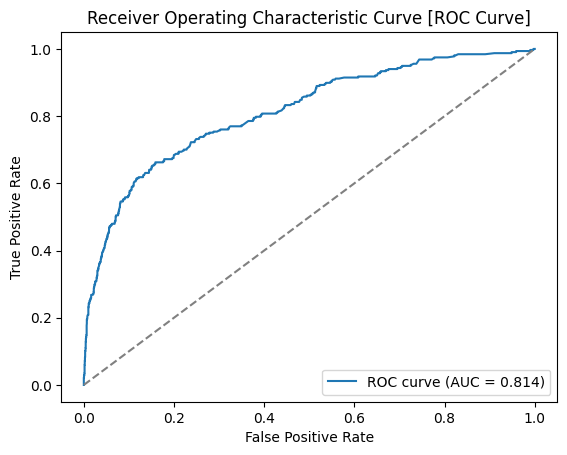

In [ ]:
plt.title('Receiver Operating Characteristic Curve [ROC Curve]')
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_value:.3f})')
plt.plot([0,1],[0,1],linestyle='--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [ ]:
youden_j=tpr-fpr
index_youden=np.argmax(youden_j)
threshold_youden=thresholds[index_youden]
print(f'The best threshold value according to Youden\'s J Statistic is {threshold_youden:.4f}')

The best threshold value according to Youden's J Statistic is 0.5161


In [ ]:
from sklearn.metrics import precision_recall_curve
pre,rec,threshold=precision_recall_curve(y_test_t.values.astype(int),y_prob[:,1])

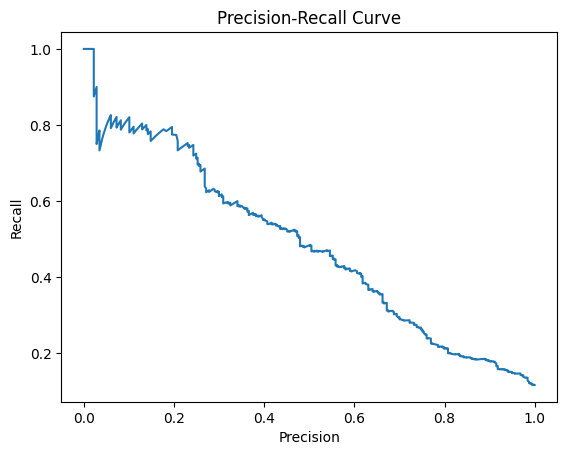

In [ ]:
plt.title('Precision-Recall Curve')
plt.plot(rec, pre)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

In [ ]:
pre_rec_df=pd.DataFrame({'Precision':pre[:-1],'Recall':rec[:-1],'Threshold':threshold})
pre_rec_df

,Precision,Recall,Threshold
0,0.116845,1.000000,0.077817
1,0.116888,1.000000,0.079058
2,0.116931,1.000000,0.083107
3,0.117104,1.000000,0.084130
4,0.117147,1.000000,0.088269
...,...,...,...
1396,1.000000,0.018927,0.961108
1397,1.000000,0.012618,0.961424
1398,1.000000,0.009464,0.961760
1399,1.000000,0.006309,0.963180


In [ ]:
filtered_metric_df= pre_rec_df[1>(pre_rec_df['Recall']>=0.60)]
len(filtered_metric_df)
filtered_metric_df.head(20)

,Precision,Recall,Threshold
1022,0.417582,0.599369,0.573671
1023,0.416300,0.596215,0.574111
1024,0.415011,0.593060,0.574571
1025,0.415929,0.593060,0.575000
1026,0.416851,0.593060,0.575745
1027,0.416481,0.589905,0.577580
1028,0.417411,0.589905,0.578589
1029,0.418345,0.589905,0.579865
1030,0.421171,0.589905,0.581324
1031,0.423077,0.589905,0.581844


In [ ]:
f1 = 2 * (pre * rec) / (pre + rec)
best_idx = f1.argmax()
print("Best threshold (max F1):", threshold[best_idx])
print("Precision:", pre[best_idx], "Recall:", rec[best_idx])

Best threshold (max F1): 0.6661929
Precision: 0.4701086956521739 Recall: 0.5457413249211357
